In [2]:
import pandas as pd
import numpy as np
from mido import MidiFile
# import pygame
import IPython
import matplotlib.pyplot as plt
import librosa.display
import librosa
import note_seq
import magenta

import mt3

In [2]:
MAESTRO_PATH = "../data/raw/maestro-v3.0.0/"

In [10]:
data = pd.read_csv("../data/raw/musicnet_metadata.csv")
musicnet = pd.read_csv("../data/raw/musicnet_metadata.csv")

In [4]:
data.head()

id  composer               composition                   movement  \
0  1727  Schubert  Piano Quintet in A major                 2. Andante   
1  1728  Schubert  Piano Quintet in A major         3. Scherzo: Presto   
2  1729  Schubert  Piano Quintet in A major  4. Andantino - Allegretto   
3  1730  Schubert  Piano Quintet in A major          5. Allegro giusto   
4  1733  Schubert   Piano Sonata in A major               2. Andantino   

        ensemble            source                      transcriber  \
0  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
1  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
2  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
3  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
4     Solo Piano          Museopen                Segundo G. Yogore   

  catalog_name  seconds  
0        OP114      447  
1        OP114      251  
2        OP114      444  
3        OP114      368  
4         D959      546

In [16]:
musicnet

id   composer                     composition  \
0    1727   Schubert        Piano Quintet in A major   
1    1728   Schubert        Piano Quintet in A major   
2    1729   Schubert        Piano Quintet in A major   
3    1730   Schubert        Piano Quintet in A major   
4    1733   Schubert         Piano Sonata in A major   
..    ...        ...                             ...   
325  2632  Beethoven   Piano Sonata No 10 in G major   
326  2633  Beethoven   Piano Sonata No 10 in G major   
327  2659       Bach  Violin Partita No 1 in B minor   
328  2677  Beethoven    Piano Sonata No 9 in E major   
329  2678  Beethoven   Piano Sonata No 10 in G major   

                      movement       ensemble            source  \
0                   2. Andante  Piano Quintet  European Archive   
1           3. Scherzo: Presto  Piano Quintet  European Archive   
2    4. Andantino - Allegretto  Piano Quintet  European Archive   
3            5. Allegro giusto  Piano Quintet  European Archive   
4                 2. Andantino     Solo Piano          Museopen   
..                         ...            ...               ...   
325                 2. Andante     Solo Piano       Paul Pitman   
326  3. Scherzo: Allegro assai     Solo Piano       Paul Pitman   
327                  6. Double    Solo Violin       John Garner   
328                 1. Allegro     Solo Piano       Paul Pitman   
329                 1. Allegro     Solo Piano       Paul Pitman   

                         transcriber catalog_name  seconds  
0    http://tirolmusic.blogspot.com/        OP114      447  
1    http://tirolmusic.blogspot.com/        OP114      251  
2    http://tirolmusic.blogspot.com/        OP114      444  
3    http://tirolmusic.blogspot.com/        OP114      368  
4                  Segundo G. Yogore         D959      546  
..                               ...          ...      ...  
325                    piano-midi.de      OP14NO2      341  
326                    piano-midi.de      OP14NO2      227  
327                         suzumidi      BWV1002      108  
328                    piano-midi.de      OP14NO1      445  
329                    piano-midi.de      OP14NO2      472  

[330 rows x 9 columns]

In [18]:
track_data = pd.read_csv("../data/raw/musicnet/musicnet/train_labels/2632.csv")
track_data

start_time  end_time  instrument  note  start_beat  end_beat note_value
0         111582    120286           1    55        0.75  0.239583  Sixteenth
1         120798    135134           1    55        1.00  0.489583     Eighth
2         120798    135134           1    52        1.00  0.489583     Eighth
3         120798    135134           1    60        1.00  0.489583     Eighth
4         120798    135134           1    48        1.00  0.489583     Eighth
...          ...       ...         ...   ...         ...       ...        ...
2052    14860254  14968798           1    72      501.00  1.989583       Half
2053    14860254  14968798           1    48      501.00  1.989583       Half
2054    14860254  14968798           1    43      501.00  1.989583       Half
2055    14860254  14968798           1    36      501.00  1.989583       Half
2056    14860254  14968798           1    40      501.00  1.989583       Half

[2057 rows x 7 columns]

In [5]:
data.composer.value_counts()

Beethoven    157
Bach          67
Schubert      30
Mozart        24
Brahms        24
Cambini        9
Dvorak         8
Faure          4
Ravel          4
Haydn          3
Name: composer, dtype: int64

In [6]:
midi = MidiFile("../data/raw/musicnet_midis/musicnet_midis/Mozart/1788_kv_465_1.mid")
midi

<midi file '../data/raw/musicnet_midis/musicnet_midis/Mozart/1788_kv_465_1.mid' type 1, 5 tracks, 10117 messages>

In [33]:
ns = note_seq.midi_file_to_note_sequence("../data/raw/musicnet_midis/musicnet_midis/Mozart/1788_kv_465_1.mid")
ns.notes

[pitch: 81
velocity: 73
start_time: 5.0
end_time: 8.75
program: 40
, pitch: 79
velocity: 91
start_time: 8.75
end_time: 10.0
program: 40
, pitch: 78
velocity: 105
start_time: 10.0
end_time: 11.25
program: 40
, pitch: 79
velocity: 108
start_time: 11.25
end_time: 13.125
program: 40
, pitch: 81
velocity: 108
start_time: 13.125
end_time: 13.75
program: 40
, pitch: 82
velocity: 108
start_time: 13.75
end_time: 14.375
program: 40
, pitch: 84
velocity: 108
start_time: 14.375
end_time: 15.0
program: 40
, pitch: 85
velocity: 108
start_time: 15.0
end_time: 16.25
program: 40
, pitch: 79
velocity: 73
start_time: 20.0
end_time: 23.75
program: 40
, pitch: 77
velocity: 93
start_time: 23.75
end_time: 25.0
program: 40
, pitch: 76
velocity: 106
start_time: 25.0
end_time: 26.25
program: 40
, pitch: 77
velocity: 108
start_time: 26.25
end_time: 28.125
program: 40
, pitch: 79
velocity: 108
start_time: 28.125
end_time: 28.75
program: 40
, pitch: 80
velocity: 108
start_time: 28.75
end_time: 29.375
program: 40
,

In [32]:
ns_trimmed = note_seq.NoteSequence()
ns_trimmed.CopyFrom(ns)
channels = set((note.pitch, note.program, note.is_drum)
                for note in ns_trimmed.notes)
for pitch, program, is_drum in channels:
    notes = [note for note in ns_trimmed.notes if note.pitch == pitch
                and note.program == program and note.is_drum == is_drum]
    sorted_notes = sorted(notes, key=lambda note: note.start_time)
    for i in range(1, len(sorted_notes)):
        if sorted_notes[i - 1].end_time > sorted_notes[i].start_time:
            sorted_notes[i - 1].end_time = sorted_notes[i].start_time
valid_notes = [note for note in ns_trimmed.notes
                if note.start_time < note.end_time]
del ns_trimmed.notes[:]
ns_trimmed.notes.extend(valid_notes)
ns_trimmed.notes

[pitch: 81
velocity: 73
start_time: 5.0
end_time: 8.75
program: 40
, pitch: 79
velocity: 91
start_time: 8.75
end_time: 10.0
program: 40
, pitch: 78
velocity: 105
start_time: 10.0
end_time: 11.25
program: 40
, pitch: 79
velocity: 108
start_time: 11.25
end_time: 13.125
program: 40
, pitch: 81
velocity: 108
start_time: 13.125
end_time: 13.75
program: 40
, pitch: 82
velocity: 108
start_time: 13.75
end_time: 14.375
program: 40
, pitch: 84
velocity: 108
start_time: 14.375
end_time: 15.0
program: 40
, pitch: 85
velocity: 108
start_time: 15.0
end_time: 16.25
program: 40
, pitch: 79
velocity: 73
start_time: 20.0
end_time: 23.75
program: 40
, pitch: 77
velocity: 93
start_time: 23.75
end_time: 25.0
program: 40
, pitch: 76
velocity: 106
start_time: 25.0
end_time: 26.25
program: 40
, pitch: 77
velocity: 108
start_time: 26.25
end_time: 28.125
program: 40
, pitch: 79
velocity: 108
start_time: 28.125
end_time: 28.75
program: 40
, pitch: 80
velocity: 108
start_time: 28.75
end_time: 29.375
program: 40
,

In [34]:
for track in midi.tracks:
    for note in track:
        print(note)

<meta message track_name name='made by G.R. Findenegg' time=0>
<meta message set_tempo tempo=1250000 time=0>
<meta message key_signature key='C' time=0>
<meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=1500000 time=15120>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=461538 time=960>
<meta message set_tempo tempo=521739 time=125760>
<meta message set_tempo tempo=461538 time=960>
<meta message set_tempo tempo=480000 time=86640>
<meta message set_tempo tempo=500000 time=240>
<meta message set_tempo tempo=521739 time=240>
<meta message set_tempo tempo=545454 time=240>
<meta message set_tempo tempo=571428 time=240>
<meta message set_tempo tempo=600000 time=240>
<meta message set_tempo tempo=631578 time=240>
<meta message end_of_track time=0>
<meta message track_name name='Violino I' time=0>
program_cha

In [8]:
y, sr = librosa.load("../data/raw/musicnet/musicnet/train_data/1727.wav")

In [9]:
print(y.shape)
print(sr)

(9857664,)
22050


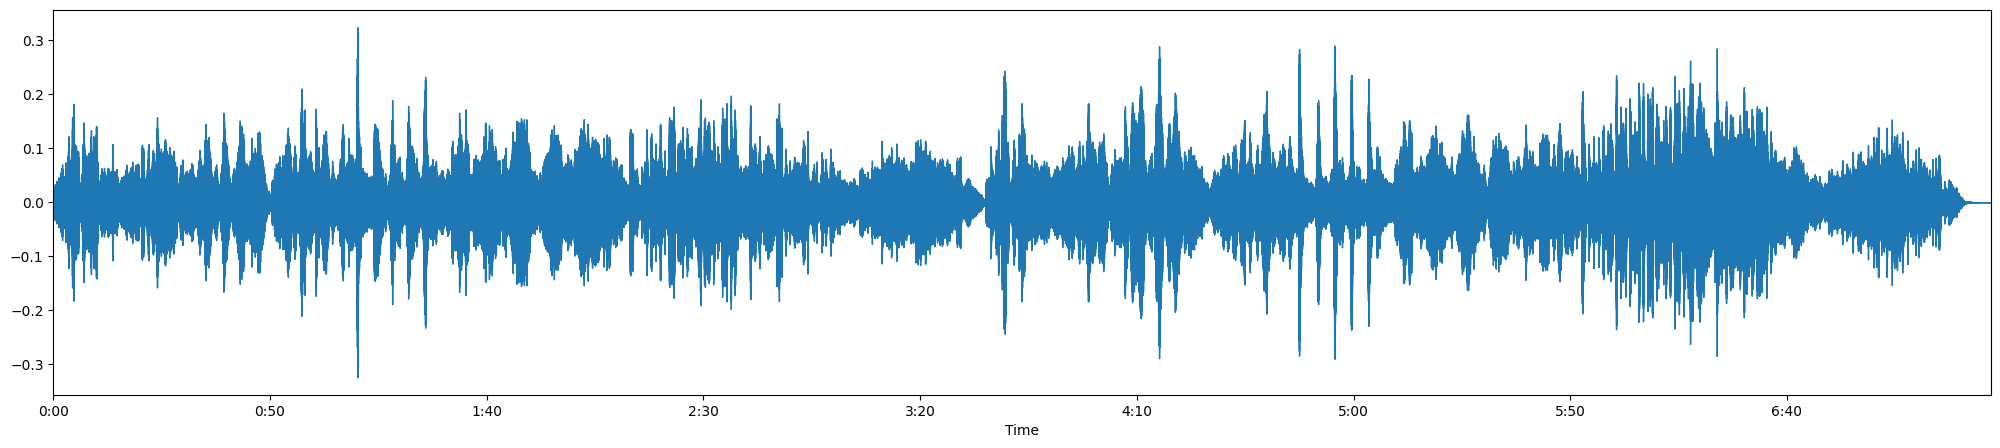

In [ ]:
plt.figure(figsize=(25, 5))
librosa.display.waveplot(y, sr=sr)

<AxesSubplot:xlabel='Time', ylabel='Hz'>

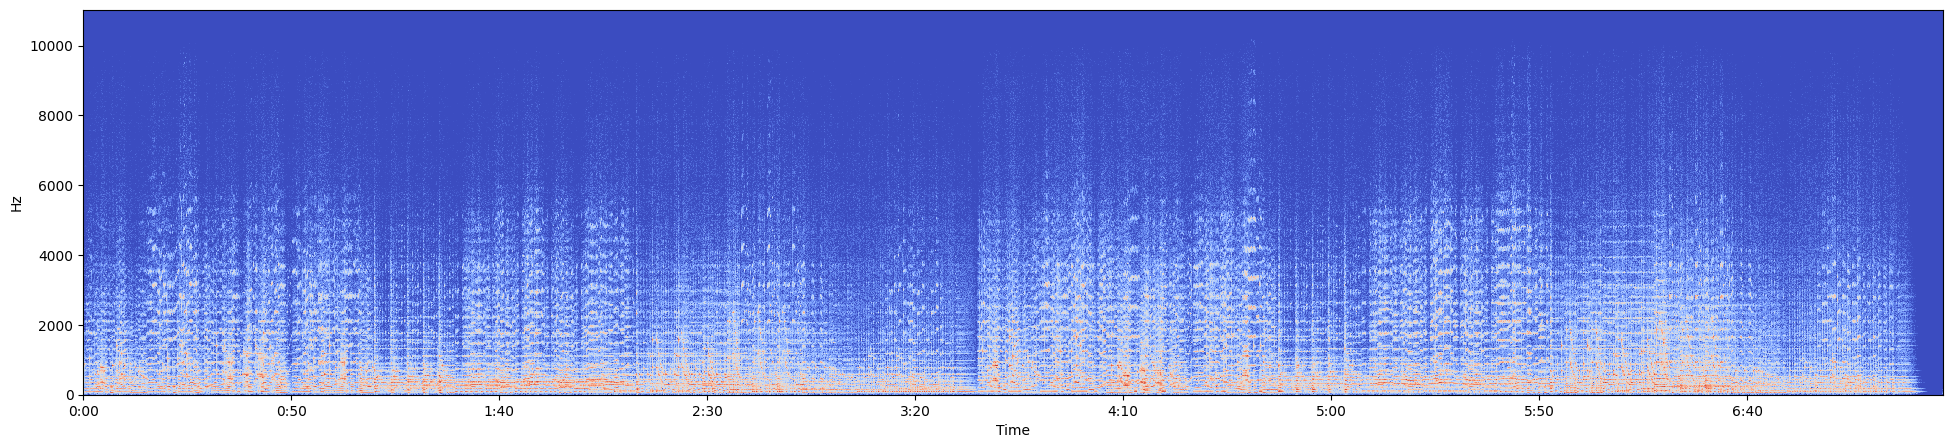

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(24, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [2]:
maestro_ds = pd.read_csv("../data/raw/maestro-v3.0.0/maestro-v3.0.0.csv")

In [3]:
maestro_ds

canonical_composer                 canonical_title       split  \
0                  Alban Berg                    Sonata Op. 1       train   
1                  Alban Berg                    Sonata Op. 1       train   
2                  Alban Berg                    Sonata Op. 1       train   
3          Alexander Scriabin   24 Preludes Op. 11, No. 13-24       train   
4          Alexander Scriabin                3 Etudes, Op. 65  validation   
...                       ...                             ...         ...   
1271  Wolfgang Amadeus Mozart         Sonata in F Major, K280        test   
1272  Wolfgang Amadeus Mozart         Sonata in F Major, K280       train   
1273  Wolfgang Amadeus Mozart         Sonata in F Major, K533  validation   
1274  Wolfgang Amadeus Mozart    Sonata in F Major, K533/K494  validation   
1275  Wolfgang Amadeus Mozart  Twelve Variations, K179 (189a)       train   

      year                                      midi_filename  \
0     2018  2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...   
1     2008  2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...   
2     2017  2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...   
3     2004  2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...   
4     2006  2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...   
...    ...                                                ...   
1271  2004  2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...   
1272  2004  2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...   
1273  2004  2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...   
1274  2018  2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...   
1275  2004  2004/MIDI-Unprocessed_XP_04_R1_2004_01-02_ORIG...   

                                         audio_filename     duration  
0     2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...   698.661160  
1     2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...   759.518471  
2     2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...   464.649433  
3     2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...   872.640588  
4     2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...   397.857508  
...                                                 ...          ...  
1271  2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...   241.470442  
1272  2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...   114.696243  
1273  2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...  1139.198478  
1274  2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...  1068.751602  
1275  2004/MIDI-Unprocessed_XP_04_R1_2004_01-02_ORIG...   630.266303  

[1276 rows x 7 columns]

In [4]:
maestro_ds["audio_filename"][0]

'2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_2018_wav--1.wav'

In [7]:
y, sr = librosa.load(MAESTRO_PATH + maestro_ds["audio_filename"][0])
spectrogram = librosa.feature.melspectrogram(y, sr, n_mels=128, fmin=8, fmax=12500)

/home/ilya20/documents/MusicTranscription/.venv/lib/python3.8/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


<AxesSubplot:>

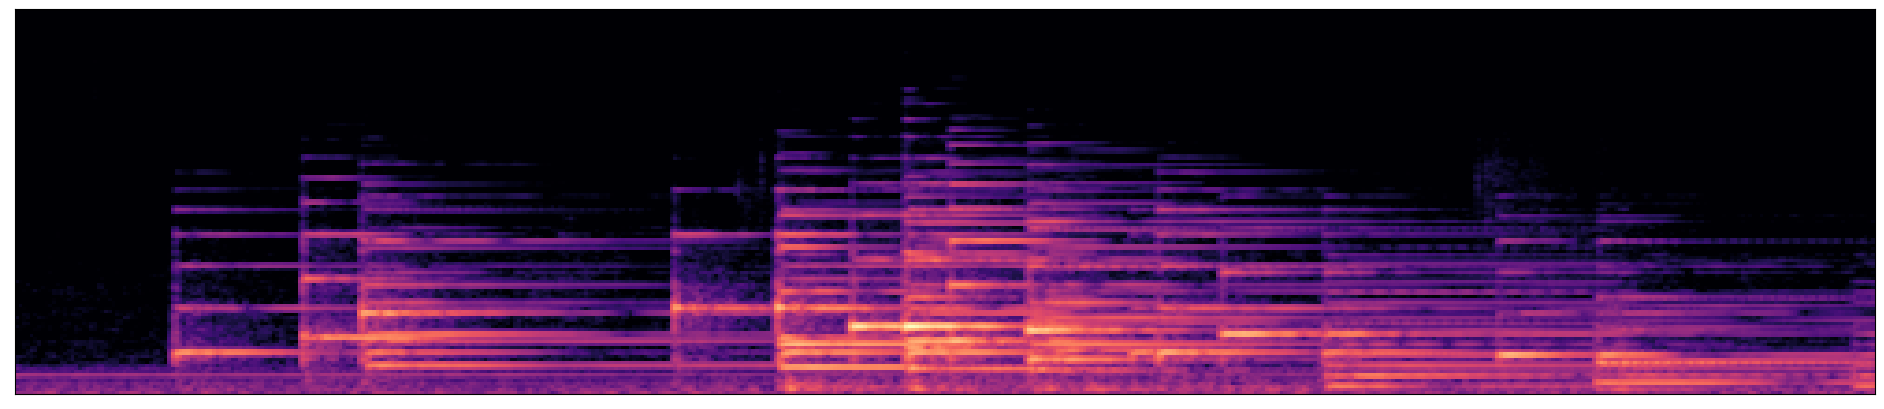

In [8]:
s_db = librosa.power_to_db(spectrogram)
plt.figure(figsize=(24, 5))
librosa.display.specshow(s_db[:, :500], sr=sr)

In [9]:
s_db.shape
# np.savez_compressed("test", s_db)
# loaded_sdb = np.load("test.npz")
# loaded_sdb

(128, 30331)

<AxesSubplot:>

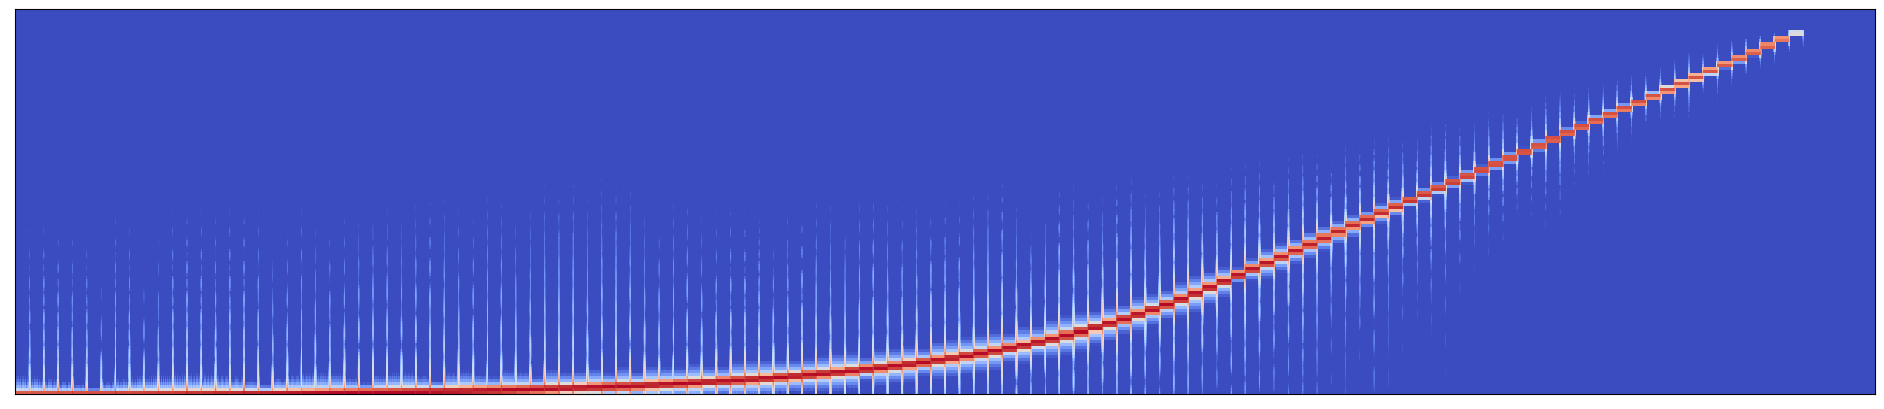

In [15]:
y, sr = librosa.load("../data/raw/MIDI all.wav")
spectrogram = librosa.feature.melspectrogram(y, sr, n_mels=128, fmin=8, fmax=12500)

s_db = librosa.power_to_db(spectrogram)
plt.figure(figsize=(24, 5))
librosa.display.specshow(s_db, sr=sr)

<AxesSubplot:>

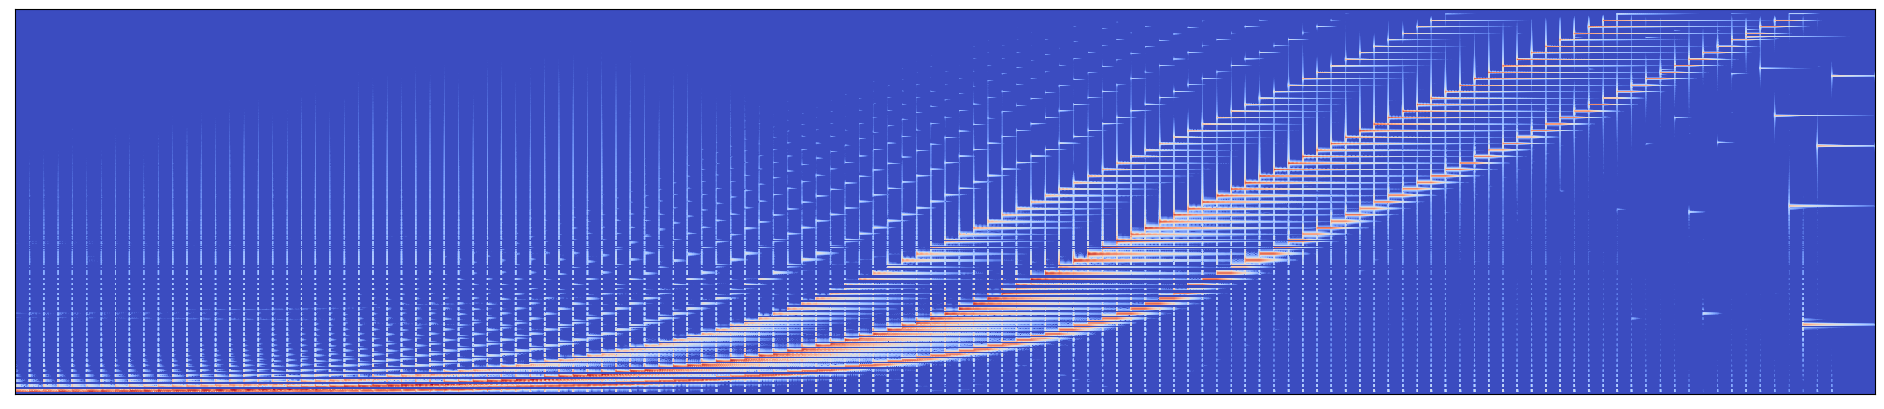

In [11]:
y, sr = librosa.load("../data/raw/MIDI all synth.wav")
spectrogram = librosa.feature.melspectrogram(y, sr, n_mels=1000)

s_db = librosa.power_to_db(spectrogram)
plt.figure(figsize=(24, 5))
librosa.display.specshow(s_db, sr=sr)